# Практическая работа №3: Статистический анализ социальных сетей.
Выполнил студент гр. 0383 Позолотин Константин. Вариант №62

## Цель работы
Овладеть навыками работы с математическими пакетами для статистического анализа социальных сетей.

## Основные теоретические положения
**Диада** - элемент сети, представляющий собой пару акторов и возможнную связь между ними.

Взаимная диада: $D_{i,j} = (1, 1)$

Асимметричная диада: $D_{i,j} = (0, 1)$ или $D_{i,j} = (1, 0)$

Нулевая диада: $D_{i,j} = (0, 0)$

**Цензус диад** - это тройка чисел (M,A,N):
- M = $\sum_{i<j}X_{ij}X_{ji}$
- A = $X_{++}-2M$
- N = $\binom{g}{2}-A-M$

**Индекс взаимности Каца-Пауэлла** - характеристика измерения тенденции акторов в группе: $-\infty < \rho_{kp} \leq 1$

Индекс взаимности Каца-Пауэлла на ожидании количества взаимных диад, предполгая, что выбор делается акторами случайным образом.

При свободном выборе:

- Оценка $p_{kp}$ по методу моментов.
${\rho{'}_{kp} = \frac {2(g-1)^2M-L^2+L_2}{L(g-1)^2-L^2+L_2}},$
где $L = \sum_i x_{i+}$, $L_2 = \sum_i x^2_{i+}$

- Вероятность того, что акторы имеют взаимные отношения.
$\frac {x_{i+}x_{j+}}{(g-1)^2}$

При фиксированном выборе:

- Каждый актор делает $d$ выборов из $(g-1)$ акторов, доступных для выбора.

- Оценка по методу моментов: $\hat{\rho}_{KP} = \displaystyle{\frac{2(g-1)M - gd^2}{gd(g - 1 - d)}}$.

- Вероятность взаимного выбора между любой произвольной парой акторов.
$\frac {d^2}{(g-1)^2}$

**Индекс взаимности Каца-Пауэлла** - характеристика измерения тенденции акторов в группе к взаимному выбору друг друга. $(-\infty < \rho_{KP} \le 1)$

**Индекс взаимности Бандиопадхьяйя** - индекс, основанный на максимальной и минимальной значениях количества взаимных диад в сети. 

$\rho_B = \displaystyle{\frac{M - M_{\min}}{M_{\max} - M_{\min}}},$ 

где $M_{\min} = \max f(t), 0 \le t \le g$, 

$M_{\max} = \lfloor 0.5 \sum^g_{i = 1} X_{i+} - \max g(t)\rfloor, 0 \le t \le g,$

$f(t) = \sum^t_{i=1} X_{i+} - t(g - 1) - (^t_2),$

$g(t) = \sum^t_{i=1} X_{i+} - t(t - 1) - \sum^g_{i=t+1} \min (t, X_{i+}).$

**Вычисление доверительного интервала для оценки параметра P**:

Оценка P: $\hat{P} = \displaystyle{\frac{\sum_{i = 1}^g \sum_{j = 1}^g x_{ij}}{g(g-1)} = \frac{l}{g(g - 1)}}.$

Доверительный интервал: $\hat{P}_{lower} \le P \le \hat{P}_{upper}$.

$\hat{P}_{lower} = \displaystyle{\hat{P} - z_{\alpha/2} \sqrt\frac{\hat{P}(1- \hat{P})}{g(g-1)}}$

$\hat{P}_{lower} = \displaystyle{\hat{P} + z_{\alpha/2} \sqrt\frac{\hat{P}(1- \hat{P})}{g(g-1)}}$

$\Phi(z_{\alpha/2}) = 0.5 - \frac{\alpha}2$, где $\alpha - $ уровень значимости, $(1 - \alpha) - $ доверительная надёжность. 


## Постановка задачи
С помощью математических пакетов и соответствующих библиотек провести статистический анализ случайно смоделированного ориентированного графа. Полученные результаты содержательно проинтерпретировать

## Выполнение работы


In [2]:
library(statnet)
library(igraph)

Задача 1. С помощью библиотеки igraph был смоделирован случайный орграф на основе модели Эрдеша—Реньи.

In [4]:
g <- 69
p <- 0.78
p0 <- 0.74
a <- 0.04
graph <- erdos.renyi.game(g, p, directed = TRUE)

Модель описывается следующим образом: в графе $\mathcal{G} (g, p)$ имеется 𝑔 вершин, и для каждого ребра вероятность того, что оно присутствует в графе, равна 𝑝.

Задача 2. Сгенерированный орграф был отображен на экране.

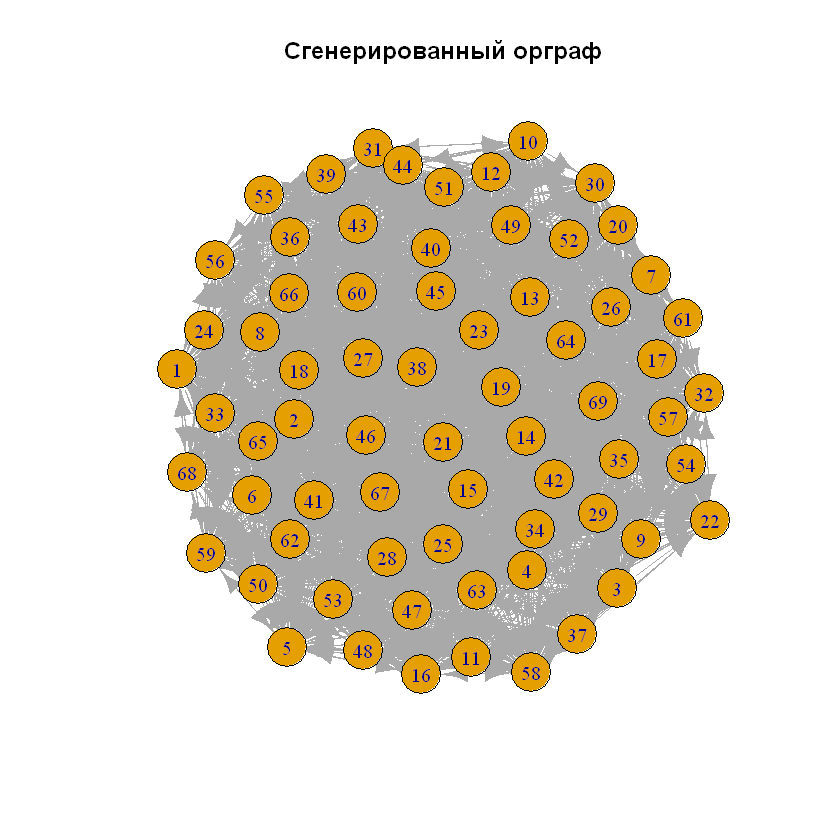

In [5]:
plot(graph, layout = layout_with_fr(graph), main = "Сгенерированный орграф")


Задача 3. Была вычислена пятичисловая сводка сети.

In [6]:
cat("(a) Размер сети: ", gorder(graph), "\n")
cat("(b) Плотность сети: ", edge_density(graph), "\n")
cat("(с) Число компонент: ", components(graph)$no, "\n")
cat("(d) Диаметр сети: ", diameter(graph), '\n')
cat("(e) Коэффициент кластеризации: ", transitivity(graph), '\n')

(a) Размер сети:  69 
(b) Плотность сети:  0.7730179 
(с) Число компонент:  1 
(d) Диаметр сети:  2 
(e) Коэффициент кластеризации:  0.9495693 


Задача 4. Был вычислен цензус диад.

In [7]:
census <- dyad_census(graph)
cat("Количество взаимных диад: ", census$mut, "\n")
cat("Количество асимметричных диад: ", census$asym, "\n")
cat("Количество нулевых диад: ", census$null, "\n")

Количество взаимных диад:  1399 
Количество асимметричных диад:  829 
Количество нулевых диад:  118 


Вывод: в сгенерированном графе больше всего взаимных диад и меньше всего нулевых, ведь вероятность появления ребра между двумя вершинами во время генерации была довольно высока.

Задача 5. Была вычислена оценка индекса взаимности Каца—Пауэла при фиксированом выборе акторов 𝑑 и при свободном выборе.

In [8]:
d <- 45 
cat("Оценка при фиксированном выборе: ", (2*(g-1)*census$mut - g * d^2)/(g*d*(g - 1 - d)), "\n")
X <- as.matrix(as_adjacency_matrix(graph))
L <- sum(rowSums(X))
L2 <- sum(rowSums(X)^2)
cat("Оценка при свободном выборе: ",(2*(g - 1)^2 * census$mut - L^2 + L2)/(L*(g - 1)^2 - L^2 + L2), "\n")

Оценка при фиксированном выборе:  0.7076805 
Оценка при свободном выборе:  -0.006767646 


Вывод: получаем, что при фиксированном выборе (d=45) акторы имеют положительную тенденцию к образованию взаимных диад, а при свободном выборе не имеют такой тенденции.

Задача 6. Была вычислена вероятность того, что связь будет взаимной для каждого случая.

In [11]:
tmp<-(d / (g-1)) * ((d/(g-1)) + ((2*(g-1)*census$mut - g * d^2)/(g*d*(g - 1 - d)))*(g - 1 - d) / (g - 1))
cat("Вероятность того, что связь будет взаимной для фиксированного выбора: ", tmp, "\n")
tmp <- mean((rowSums(X) * colSums(X))/(g - 1)^2)
cat("Вероятность того, что связь будет взаимной для свободного выбора: ", tmp, "\n")


Вероятность того, что связь будет взаимной для фиксированного выбора:  0.5963342 
Вероятность того, что связь будет взаимной для свободного выбора:  0.5971272 


Задача 7. Был вычислен индекс взаимности Бандиопадхьяйя.

In [12]:
f_t <- function(t){
    return(sum(rowSums(X)[1:t]) - t * (g - 1) - choose(t, 2))
} 
g_t <- function(t){
    min_sum <- 0
    for (i in (t+1):g){
        min_sum <- min_sum + min(t, rowSums(X)[i])
    }
    return(sum(rowSums(X)[1:t]) - t * (t - 1) - min_sum)
}

g_res <- (1:g-1)
for (t in 1:(g-1)) {
    g_res[t] <- g_t(t)
}

f_res <- (1:g-1)
for (t in 1:(g-1)) {
    f_res[t] <- f_t(t)
}

M_max <- floor(0.5 * sum(rowSums(X)[1:g]) - max(g_res))
M_min <- max(f_res)

cat("Индекс взаимности Бандиопадхьяйя: ", (census$mut - M_min)/(M_max - M_min), "\n")

Индекс взаимности Бандиопадхьяйя:  0.7936792 


Вывод: полученный индекс взаимности примерно равен p.

Задача 8. Была проверена нулевая гипотеза о том, что число дуг $L$ в орграфе $\mathscr{G}_d$ имеет биномиальное распределение $L ∼ Bin(g(g − 1),\frac{1}{2})$. Был определён максимальный уровень значимости, при котором нулевая гипотеза не отвергается.

In [13]:
binom.test(sum(X), g*(g-1), p = 0.5)


	Exact binomial test

data:  sum(X) and g * (g - 1)
number of successes = 3627, number of trials = 4692, p-value < 2.2e-16
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.7607579 0.7849373
sample estimates:
probability of success 
             0.7730179 


Вывод: p-value во много раз меньше $\alpha$ => нулевая гипотеза не выполняется; p-value, близкий к нулю, является максимальным уровнем значимости, при котором гипотеза не отвергается.

Задача 9.  Была проверена нулевая гипотеза о том, что число дуг $L$ в орграфе $\mathscr{G}_d$ имеет биномиальное распределение $L ∼ Bin(g(g − 1),\frac{1}{2})$. Был определён максимальный уровень значимости, при котором нулевая гипотеза не отвергается.

In [14]:
binom.test(sum(X), g*(g-1), p = P0)


	Exact binomial test

data:  sum(X) and g * (g - 1)
number of successes = 3627, number of trials = 4692, p-value =
1.871e-07
alternative hypothesis: true probability of success is not equal to 0.74
95 percent confidence interval:
 0.7607579 0.7849373
sample estimates:
probability of success 
             0.7730179 


Вывод: p-value во много раз меньше $\alpha$ => нулевая гипотеза не выполняется; p-value, близкий к нулю, является максимальным уровнем значимости, при котором гипотеза не отвергается.

Задача 10. Был построен доверительный интервал для оценки параметра 𝑝 с доверительной надёжностью (1 − 𝛼).

In [16]:
z <- 1.96 # по таблице значений функции Лапласа (Ф(z) = 0.5 - (0.5/2))
estimation <- gsize(graph)/(g*(g-1))
p_lower <- estimation - z * sqrt((estimation * (1 - estimation))/(g * (g - 1)))
p_upper <- estimation + z * sqrt((estimation * (1 - estimation))/(g * (g - 1)))
cat("Доверительный интервал: [", p_lower, ",", p_upper, "]")

Доверительный интервал: [ 0.7610321 , 0.7850037 ]

Вывод: p = 0.78 попадает в доверительный интервал, следовательно, доверительный интервал вычислен верно.

## Выводы

В ходе выполнения практической работы были получены навыки работы с математическими пакетами для статистического анализа социальных сетей. Благодаря полученным знаниям можно определять тенденцию создания парных связей в диадах графа через вычисление цензуса диад и подсчёта с помощью него индексов взаимности Каца-Пауэла и Бандиопадхьяйя, а также определять вероятность появления рёбер и, соответсвенно, число рёбер через проверку гипотез о принадлежности числа рёбер в графе биномиальному распределению. Как и в остальной статистике матпакеты позволяют легче находить интересующие значения при больших входных данных, в данном случае при больших размерах графа и, соответсвенно, большом количестве рассматриваемых диад.